In [50]:
import numpy as np 
import matplotlib.pyplot as plt
from hodalpt.sims import alpt as CS
from hodalpt.sims import quijote as Q
from hodalpt import stats

In [76]:
ic_path = '/Users/mcc3842/CosmicSim2025/data/quijote/latin_hypercube_HR/100/ICs/'
outdir = '/Users/mcc3842/CosmicSim2025/data/quijote/latin_hypercube_HR/100/alpt/'

## base ALPT HOD vs HOD + subgrid comparison

In [ ]:
theta_gal = {
    'alpha': 1.9230, 
    'beta': 2.0253, 
    'dth': -0.7889, 
    'rhoeps': 14.6874, 
    'eps': 0.5616, 
    'nmean': 3.3e-4, 
    'rhoepsprime': 0., 
    'epsprime': 0.}
theta_rsd = {
    'bv': 0.7289, 
    'bb': 1.1652,
    'betarsd': 1.3136, 
    'gamma': 0.4944}

# without subgrid 
xyz_g0 = CS.CSbox_galaxy(theta_gal, theta_rsd, outdir, bias_model='local', subgrid=False, silent=True)
spec = stats.Pk_periodic(xyz_g0.T, Lbox=1000, Ngrid=256, Nmubin=20, fft='pyfftw', silent=True,rsd=2)
bispec = stats.B0_periodic(xyz_g0.T, w=None, Lbox=1000., fft='pyfftw', silent=True)

xyz_g1 = CS.CSbox_galaxy(theta_gal, theta_rsd, outdir, bias_model='local', subgrid=True, silent=True)
spec_sg = stats.Pk_periodic(xyz_g1.T, Lbox=1000, Ngrid=256, Nmubin=20, fft='pyfftw', silent=True,rsd=2)
bispec_sg = stats.B0_periodic(xyz_g1.T, w=None, Lbox=1000., fft='pyfftw', silent=True)



-->Find starting indices ...
-->Start loop over cells of the mesh ...
-->Find starting indices ...
-->Start loop over cells of the mesh ...


(2, 127)

In [72]:

kmin = 0.008
kmax = 0.8

k = spec['k']
k_mask = (k >= kmin) & (k <= kmax)
k_bins = k[k_mask]
n_k = np.sum(k_mask)
p0k = np.zeros((2, n_k))
p2k = np.zeros((2, n_k))

p0k[0, :] = spec['p0k'][k_mask]
p0k[1, :] = spec_sg['p0k'][k_mask]

p2k[0, :] = spec['p2k'][k_mask]
p2k[1, :] = spec_sg['p2k'][k_mask]



i_k1 = bispec['i_k1'][:]
i_k2 = bispec['i_k2'][:]
i_k3 = bispec['i_k3'][:]
k_fund = 2 * np.pi / 1000.
k1, k2, k3 = i_k1 * k_fund, i_k2 * k_fund, i_k3 * k_fund

klim = (k1 > kmin) & (k2 > kmin) & (k3 > kmin) & (k1 < kmax) & (k2 < kmax) & (k3 < kmax)
n_triangles = np.sum(klim)

b123 = np.zeros((2, n_triangles))
b123[0,:] = bispec['b123'][:][klim]
b123[1,:] = bispec_sg['b123'][:][klim]

q123 = np.zeros((2, n_triangles))
q123[0,:] = bispec['q123'][:][klim]
q123[1,:] = bispec_sg['q123'][:][klim]





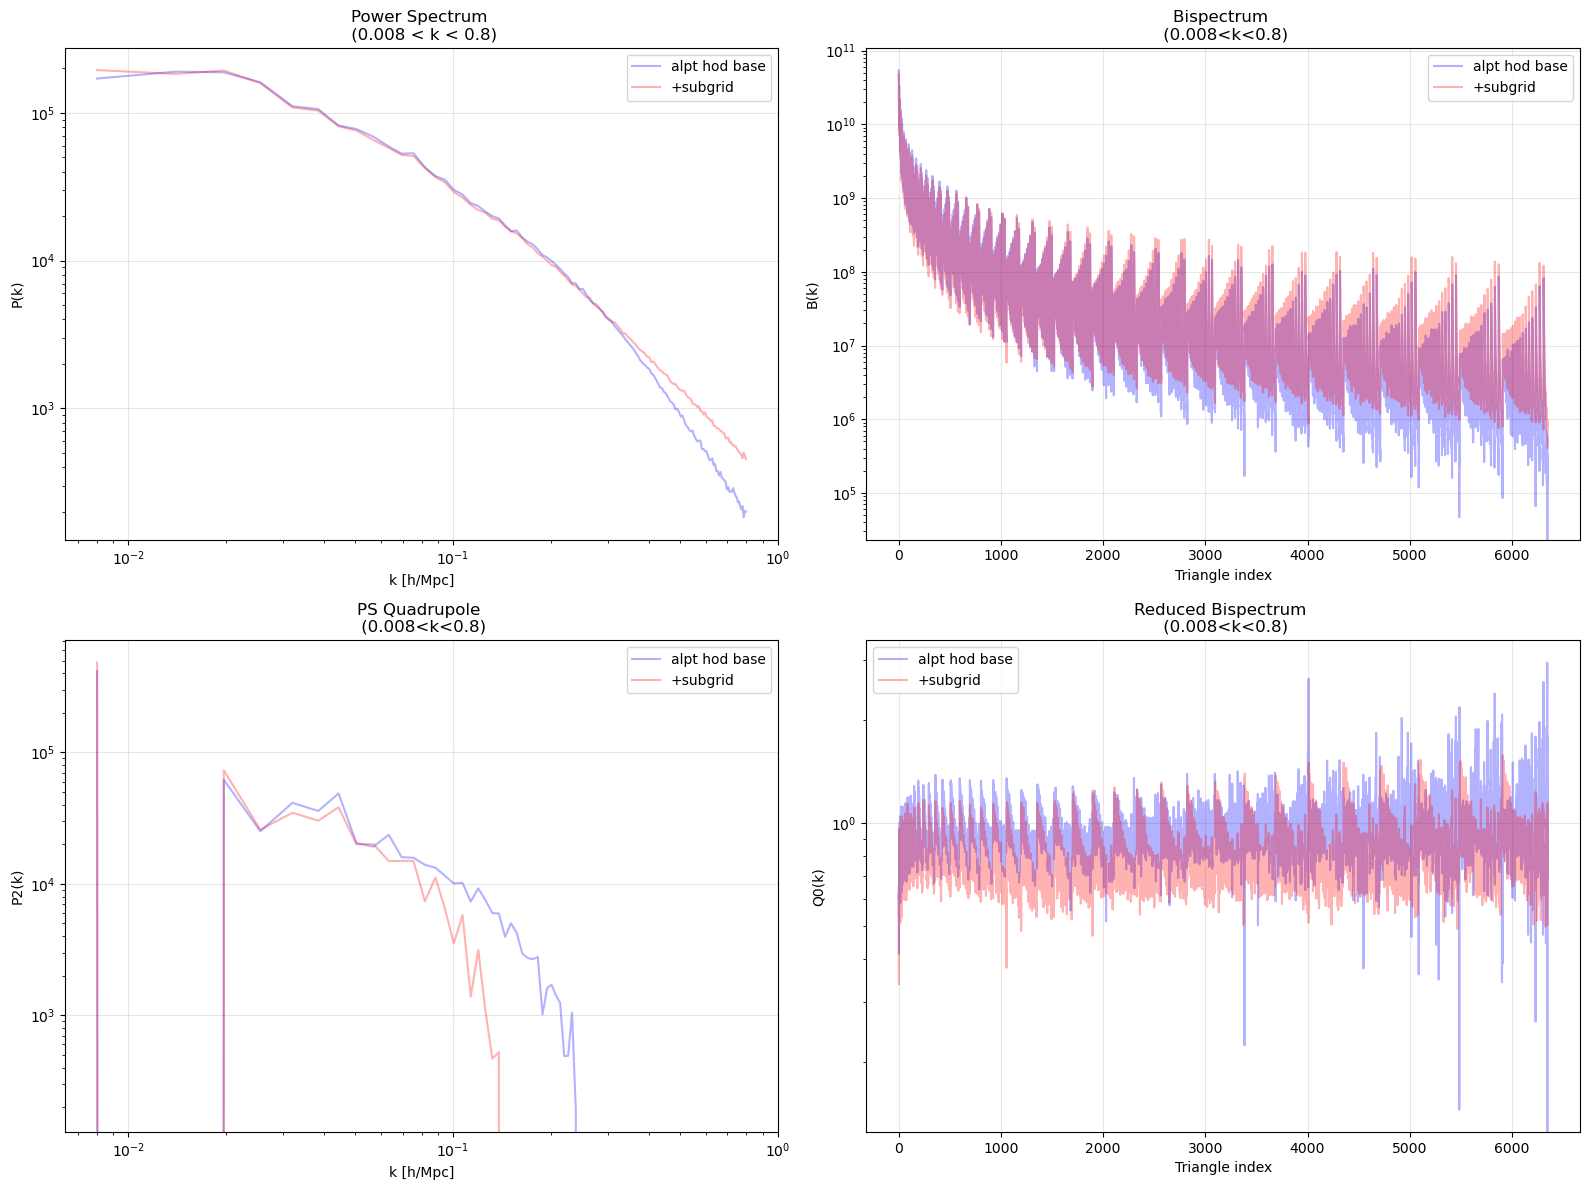

In [73]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

k = k_bins
axes[0].loglog(k, p0k[0], 'b-', alpha=0.3, label='alpt hod base')
axes[0].loglog(k, p0k[1], 'r-', alpha=0.3, label='+subgrid')
axes[0].set_xlabel('k [h/Mpc]')
axes[0].set_ylabel('P(k)')
axes[0].set_title(f'Power Spectrum \n ({kmin} < k < {kmax})')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

axes[1].plot(range(np.sum(klim)), b123[0], 'b-', alpha=0.3, label='alpt hod base')
axes[1].plot(range(np.sum(klim)), b123[1], 'r-', alpha=0.3, label='+subgrid')
axes[1].set_xlabel('Triangle index')
axes[1].set_ylabel('B(k)')
axes[1].set_title(f'Bispectrum \n ({kmin}<k<{kmax})')
axes[1].legend()
axes[1].grid(True, alpha=0.3)
axes[1].set_yscale('log')

axes[2].loglog(k, p2k[0], 'b-', alpha=0.3, label='alpt hod base')
axes[2].loglog(k, p2k[1], 'r-', alpha=0.3, label='+subgrid')
axes[2].set_xlabel('k [h/Mpc]')
axes[2].set_ylabel('P2(k)')
axes[2].set_title(f'PS Quadrupole \n ({kmin}<k<{kmax})')
axes[2].legend()
axes[2].grid(True, alpha=0.3)

axes[3].plot(range(np.sum(klim)), q123[0], 'b-', alpha=0.3, label='alpt hod base')
axes[3].plot(range(np.sum(klim)), q123[1], 'r-', alpha=0.3, label='+subgrid')
axes[3].set_xlabel('Triangle index')
axes[3].set_ylabel('Q0(k)')
axes[3].set_title(f'Reduced Bispectrum \n ({kmin}<k<{kmax})')
axes[3].legend()
axes[3].grid(True, alpha=0.3)
axes[3].set_yscale('log')

plt.tight_layout()

## nonlocal bias comparisons

In [74]:
# alpha, beta, nmean fit by francesco, other pars arbitrary or unused 
alpha = np.array([0.29685723, 1.06796392, 1.99415336, 0.85211754, 0.63162251, 1.61120672, 2.51800086, 2.56070147, 1.20938235, 0.36272172, 1.73030157, 0.85211754, 0.85211754, 0.85211754, 0.85211754, 0.85211754])
beta = np.array([82.91475146 ,68.33632545 ,39.27743698 ,25.15950722 ,87.1500282 ,25.42614578 ,71.29493583 ,77.82969567 ,70.43144589 ,3.71638296 ,71.68769349 ,56.65364231 ,25.15950722,25.15950722,25.15950722,25.15950722])
nmean = np.array([0.00012344299466349185, 3.0023000363144092e-05, 1.0960000054183183e-06, 9.999999717180685e-10, 6.269499863265082e-05, 9.156700252788141e-05, 8.287000127893407e-06, 3.899999967416079e-08, 3.330000026835478e-06, 7.215000096039148e-06, 2.342000016142265e-06, 3.199999909497819e-08, 1.6999999630229468e-08, 5.99999978589949e-08, 1.2000000104706032e-08, 0.0])
theta_gal = {
    'alpha': alpha.reshape((4, 4)),  
    'beta': beta.reshape((4, 4)), 
    'dth': np.repeat(-0.7889, 16).reshape((4, 4)),
    'rhoeps': np.repeat(14.6874, 16).reshape((4, 4)), 
    'eps': np.repeat(0.5616, 16).reshape((4, 4)),  
    'nmean': nmean.reshape((4, 4))
}
theta_rsd = {
    'bv': 0.7289, 
    'bb': 1.1652,
    'betarsd': 1.3136, 
    'gamma': 0.4944}

xyz_g2 = CS.CSbox_galaxy(theta_gal, theta_rsd, outdir, bias_model='nonlocal0', subgrid=False, silent=False)
spec_nlb = stats.Pk_periodic(xyz_g2.T, Lbox=1000, Ngrid=256, Nmubin=20, fft='pyfftw', silent=True,rsd=2)
bispec_nlb = stats.B0_periodic(xyz_g2.T, w=None, Lbox=1000., fft='pyfftw', silent=True)

OM0.313OL0.687G256V1000.0_ALPTrs5.000z0.500.dat
Omega_m 0.313000
reading /Users/mcc3842/CosmicSim2025/data/quijote/latin_hypercube_HR/100/alpt/BOXpos*OM0.313OL0.687G256V1000.0_ALPTrs5.000z0.500.dat
Reading input ...
Getting number counts via parametric bias ...
Number counts diagnostics (min, max, mean):  0.0 9.0 0.03032398223876953
Preparing galaxy positions ...
Sampling galaxy positions ...
-->Find starting indices ...
-->Start loop over cells of the mesh ...
apply RSD ...


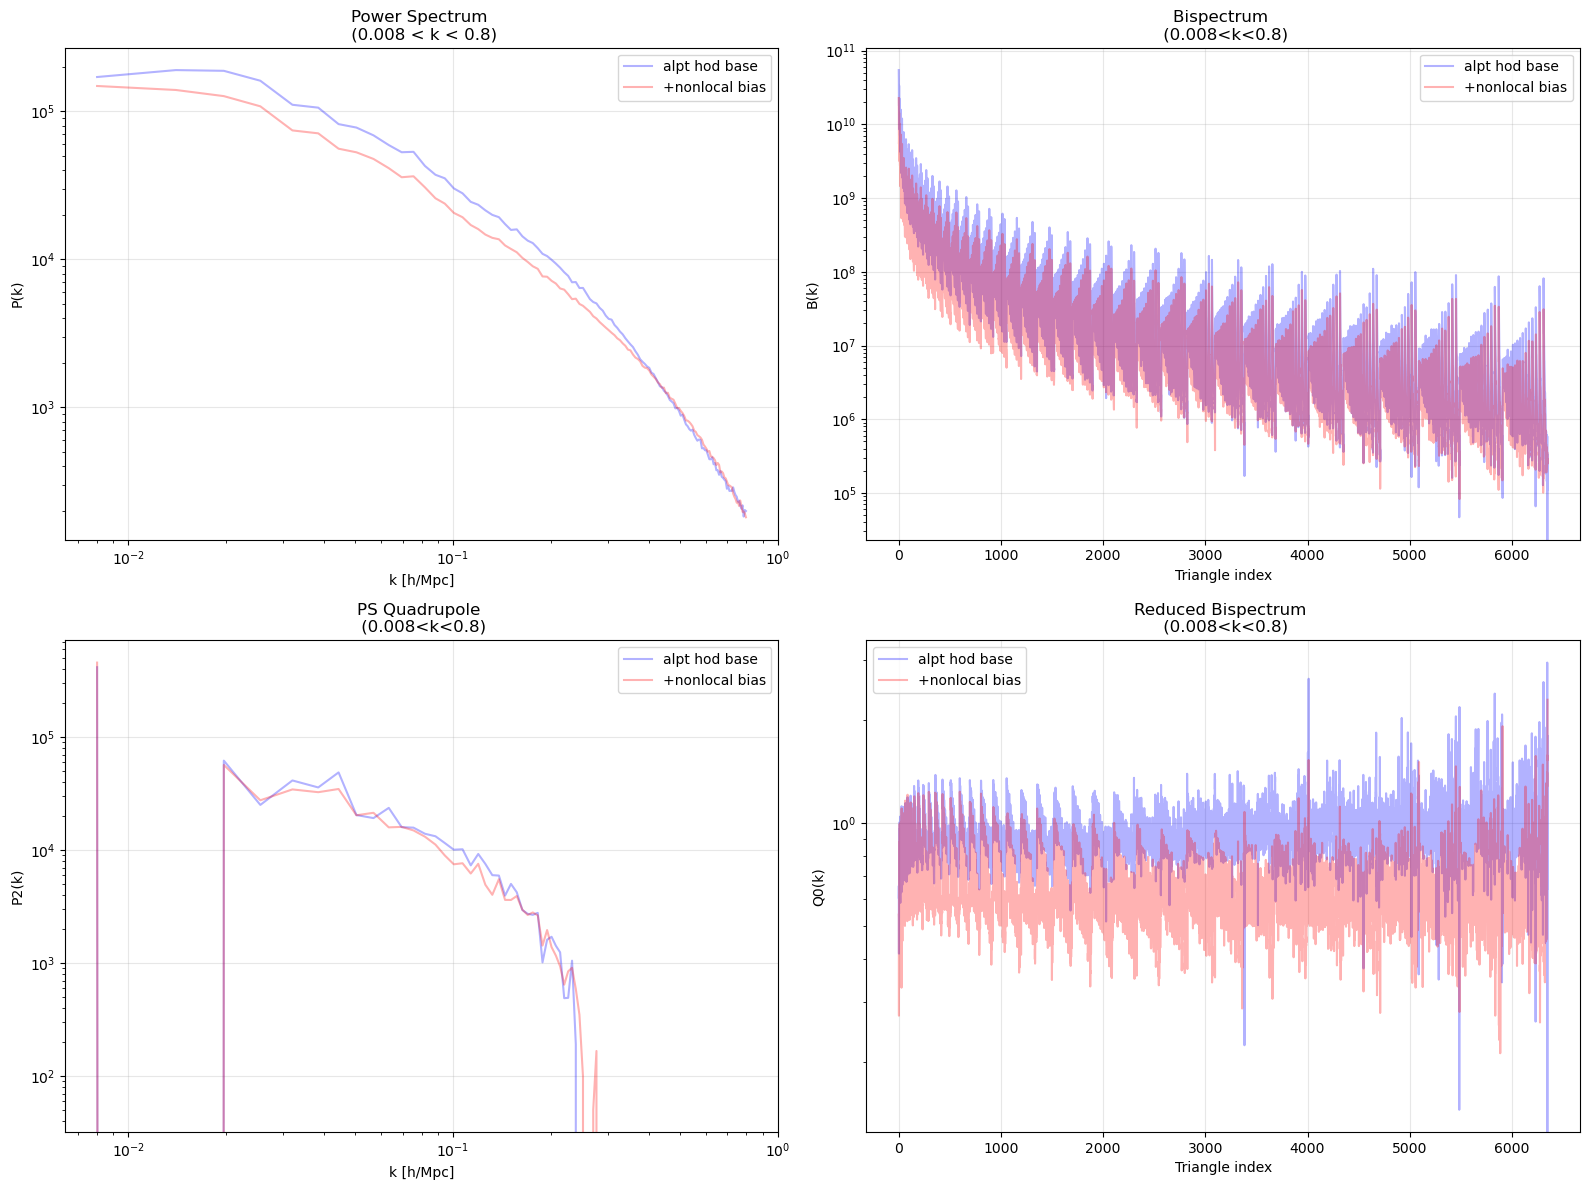

In [77]:

kmin = 0.008
kmax = 0.8

k = spec['k']
k_mask = (k >= kmin) & (k <= kmax)
k_bins = k[k_mask]
n_k = np.sum(k_mask)
p0k = np.zeros((2, n_k))
p2k = np.zeros((2, n_k))

p0k[0, :] = spec['p0k'][k_mask]
p0k[1, :] = spec_nlb['p0k'][k_mask]

p2k[0, :] = spec['p2k'][k_mask]
p2k[1, :] = spec_nlb['p2k'][k_mask]



i_k1 = bispec['i_k1'][:]
i_k2 = bispec['i_k2'][:]
i_k3 = bispec['i_k3'][:]
k_fund = 2 * np.pi / 1000.
k1, k2, k3 = i_k1 * k_fund, i_k2 * k_fund, i_k3 * k_fund

klim = (k1 > kmin) & (k2 > kmin) & (k3 > kmin) & (k1 < kmax) & (k2 < kmax) & (k3 < kmax)
n_triangles = np.sum(klim)

b123 = np.zeros((2, n_triangles))
b123[0,:] = bispec['b123'][:][klim]
b123[1,:] = bispec_nlb['b123'][:][klim]

q123 = np.zeros((2, n_triangles))
q123[0,:] = bispec['q123'][:][klim]
q123[1,:] = bispec_nlb['q123'][:][klim]

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

k = k_bins
axes[0].loglog(k, p0k[0], 'b-', alpha=0.3, label='alpt hod base')
axes[0].loglog(k, p0k[1], 'r-', alpha=0.3, label='+nonlocal bias')
axes[0].set_xlabel('k [h/Mpc]')
axes[0].set_ylabel('P(k)')
axes[0].set_title(f'Power Spectrum \n ({kmin} < k < {kmax})')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

axes[1].plot(range(np.sum(klim)), b123[0], 'b-', alpha=0.3, label='alpt hod base')
axes[1].plot(range(np.sum(klim)), b123[1], 'r-', alpha=0.3, label='+nonlocal bias')
axes[1].set_xlabel('Triangle index')
axes[1].set_ylabel('B(k)')
axes[1].set_title(f'Bispectrum \n ({kmin}<k<{kmax})')
axes[1].legend()
axes[1].grid(True, alpha=0.3)
axes[1].set_yscale('log')

axes[2].loglog(k, p2k[0], 'b-', alpha=0.3, label='alpt hod base')
axes[2].loglog(k, p2k[1], 'r-', alpha=0.3, label='+nonlocal bias')
axes[2].set_xlabel('k [h/Mpc]')
axes[2].set_ylabel('P2(k)')
axes[2].set_title(f'PS Quadrupole \n ({kmin}<k<{kmax})')
axes[2].legend()
axes[2].grid(True, alpha=0.3)

axes[3].plot(range(np.sum(klim)), q123[0], 'b-', alpha=0.3, label='alpt hod base')
axes[3].plot(range(np.sum(klim)), q123[1], 'r-', alpha=0.3, label='+nonlocal bias')
axes[3].set_xlabel('Triangle index')
axes[3].set_ylabel('Q0(k)')
axes[3].set_title(f'Reduced Bispectrum \n ({kmin}<k<{kmax})')
axes[3].legend()
axes[3].grid(True, alpha=0.3)
axes[3].set_yscale('log')

plt.tight_layout()